In [6]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from copy import deepcopy
from tqdm import tqdm_notebook as tqdm


Populating the interactive namespace from numpy and matplotlib


In [ ]:

scenarios = {1: {'r_trade': 6000,
                 'd_start': 400},
             2: {'r_trade': 6000,
                 'd_start': 550},
             3: {'r_trade': 8000,
                 'd_start': 400}
            }

final_states = pd.read_pickle('/home/jakob/Project_MayaSim/output_data/X9_stability_analysis/results/all_final_states')
final_states.head()

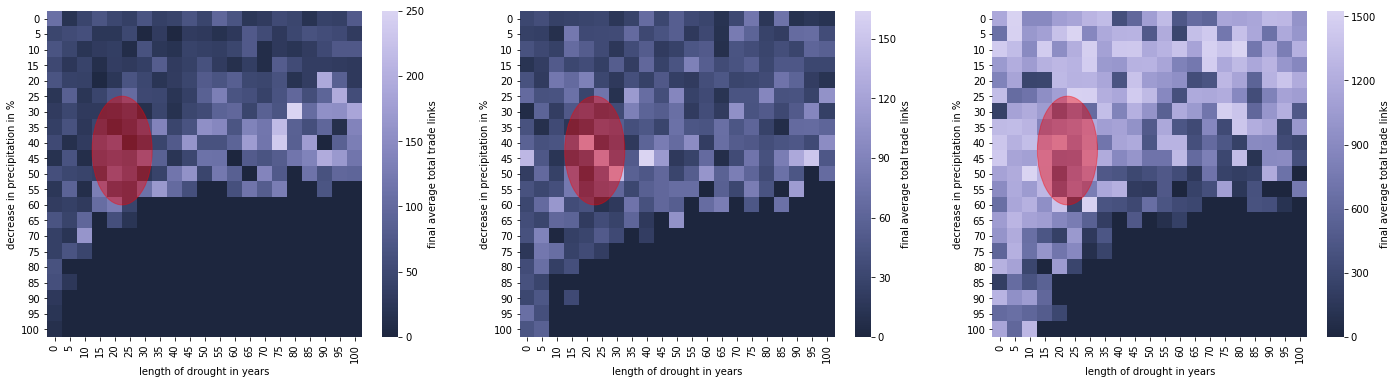

In [43]:
# Plot min of final trade links for scenario 1, 2, 3
min_data = final_states.groupby(level=[0, 1, 2, 3, 5]).min().unstack('d_length')
min_data.columns = min_data.columns.droplevel()

pylab.rcParams['figure.figsize'] = (24, 6)

fig, axes = plt.subplots(ncols=3)
cmap = sns.cubehelix_palette(start=2.8, rot=.1, reverse=True, as_cmap=True)
for ax, sc in zip(axes, [1,2,3]):
    sns.heatmap(min_data.xs(level=[*scenarios[sc].keys(), 'observables'], key=[*scenarios[sc].values(), 'final trade links']).astype('int'), 
                fmt="d", 
                ax=ax,
                cmap=cmap,
                cbar_kws={'label': 'final average total trade links'}
               )
    ax.set_ylabel('decrease in precipitation in %')
    ax.set_xlabel('length of drought in years')

    ellipse = mpl.patches.Ellipse(xy = (5, 9), width=4, height=7, color='r', alpha=0.4)
    ax.add_artist(ellipse)

fig.savefig('stability_analysis_plot_trade_links.pdf', transparent=True)

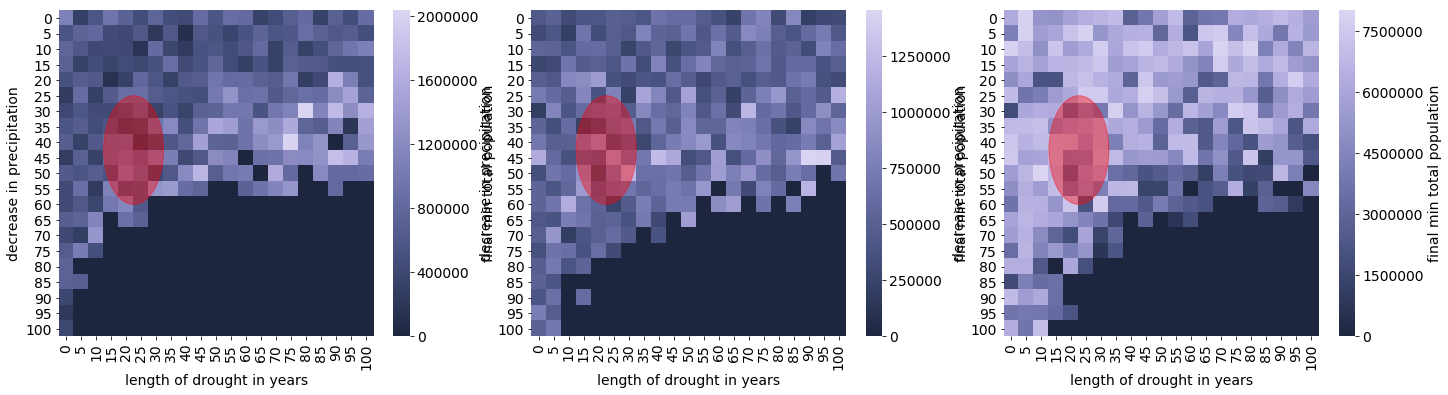

In [56]:
# Plot min of final population for scenario 1, 2, 3
min_data = final_states.groupby(level=[0, 1, 2, 3, 5]).min().unstack('d_length')
min_data.columns = min_data.columns.droplevel()
min_data.head()

pylab.rcParams['figure.figsize'] = (24, 6)

fig, axes = plt.subplots(ncols=3)
cmap = sns.cubehelix_palette(start=2.8, rot=.1, reverse=True, as_cmap=True)
for ax, sc in zip(axes, [1,2,3]):
    sns.heatmap(min_data.xs(level=[*scenarios[sc].keys(), 'observables'], key=[*scenarios[sc].values(), 'final population']).astype('int'), 
                fmt="d", 
                ax=ax,
                cmap=cmap,
                cbar_kws={'label': 'final min total population'}
               )
    ax.set_ylabel('decrease in precipitation')
    ax.set_xlabel('length of drought in years')

    ellipse = mpl.patches.Ellipse(xy = (5, 9), width=4, height=7, color='r', alpha=0.4)
    ax.add_artist(ellipse)

fig.savefig('stability_analysis_plot_population.pdf', transparent=True)

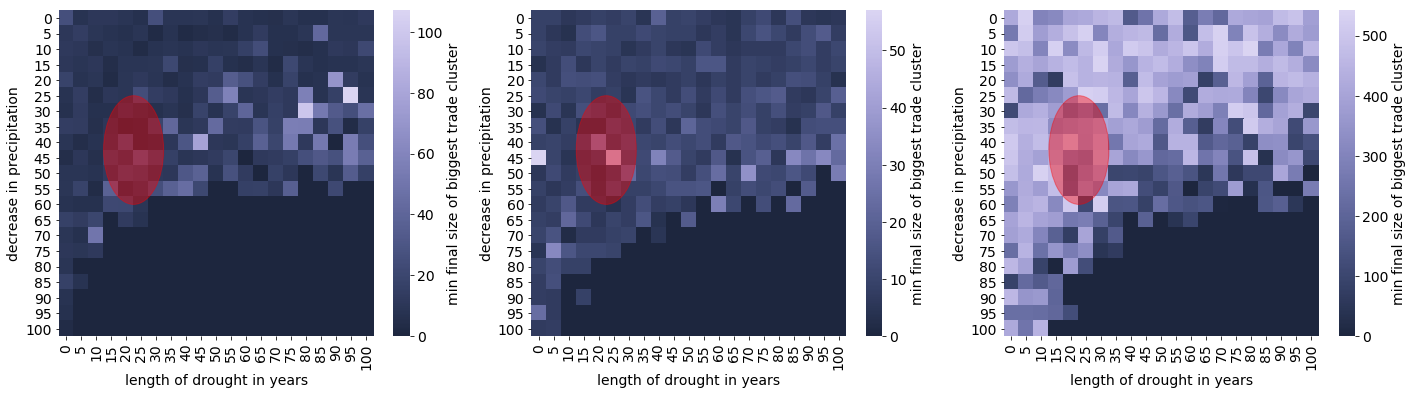

In [57]:
# Plot min of final max cluster size for scenario 1, 2, 3
min_data = final_states.groupby(level=[0, 1, 2, 3, 5]).min().unstack('d_length')
min_data.columns = min_data.columns.droplevel()
min_data.head()

pylab.rcParams['figure.figsize'] = (24, 6)

fig, axes = plt.subplots(ncols=3)
cmap = sns.cubehelix_palette(start=2.8, rot=.1, reverse=True, as_cmap=True)
for ax, sc in zip(axes, [1,2,3]):
    sns.heatmap(min_data.xs(level=[*scenarios[sc].keys(), 'observables'], key=[*scenarios[sc].values(), 'final max cluster size']).astype('int'), 
                fmt="d", 
                ax=ax,
                cmap=cmap,
                cbar_kws={'label': 'min final size of biggest trade cluster'}
               )
    ax.set_ylabel('decrease in precipitation')
    ax.set_xlabel('length of drought in years')

    ellipse = mpl.patches.Ellipse(xy = (5, 9), width=4, height=7, color='r', alpha=0.4)
    ax.add_artist(ellipse)

fig.savefig('stability_analysis_plot_clusters.pdf', transparent=True)

Caption: Average population after recovery period resulting from a drought event of given length and decrease in precipitation.

In [52]:
# define plot function and plot parameters
pylab.rcParams['figure.figsize'] = (18, 6)

def plt_heatmap(ax, obs, measure, min_data, scn, clabel=None, ylabels=None, tlabels=None):
    """plot heatmaps from experiment data and draw elipse"""
    if measure == 'max':
        min_data = final_states.groupby(level=[0, 1, 2, 3, 5]).max().unstack('d_length')
    elif measure == 'min':
        min_data = final_states.groupby(level=[0, 1, 2, 3, 5]).min().unstack('d_length')
    elif measure == 'mean':
        min_data = final_states.groupby(level=[0, 1, 2, 3, 5]).min().unstack('d_length')
    else:
        raise ValueError(f'measure {measure} is not implemented')
    min_data.columns = min_data.columns.droplevel()

    cmap = sns.cubehelix_palette(start=2.8, rot=.1, reverse=True, as_cmap=True)
    
    mi = min_data.xs(level=[*scn.keys(), 'observables'], key=[*scn.values(), obs]).astype('int').min().min()
    ma = min_data.xs(level=[*scn.keys(), 'observables'], key=[*scn.values(), obs]).astype('int').max().max()
    
    cax = sns.heatmap(min_data.xs(level=[*scn.keys(), 'observables'], key=[*scn.values(), obs]).astype('int'), 
                fmt="d", 
                ax=ax,
                cmap=cmap,
                #cbar=False,
                cbar_kws=dict(label=clabel,use_gridspec=False, location='top')
               )
    cax.collections[0].colorbar.set_ticks([mi, (mi+ma)/2., ma])
    
    if tlabels is not None:
        cax.collections[0].colorbar.set_ticklabels(tlabels)
    
    ax.invert_yaxis()
    
    ax.set_xlabel('length of drought in years')
    if ylabels is not None:
        if not ylabels:
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.yaxis.set_tick_params(size=0)
            ax.set_ylabel('')
        else:
            ax.set_ylabel('decrease in precipitation')
        
    ellipse = mpl.patches.Ellipse(xy = (5, 9), width=4, height=7, color='r', alpha=0.4)
    ax.add_artist(ellipse)

clabels = ('max of number of final climax forest cells',
           'min of final size of biggest trade cluster',
           'min of final total population'
          )
measures = ('max',
           'min',
           'min')
ylabels = (True,
           False,
           False)
observables = ('final_climax_cells',
               'final max cluster size',
               'final population'
              )
tick_labels = {1: (['46K', '64K', '81K'],
                   ['0', '53', '107'],
                   ['0', '1M', '2M']
                  ),
               2: (['51K', '66K', '81K'],
                   ['0', '28', '57'],
                   ['0', '727K', '1.4M']
                  ),
               3: (['8K', '45K', '81K'],
                   ['0', '271', '542'],
                   ['0', '4M', '8M']
                  )
              }

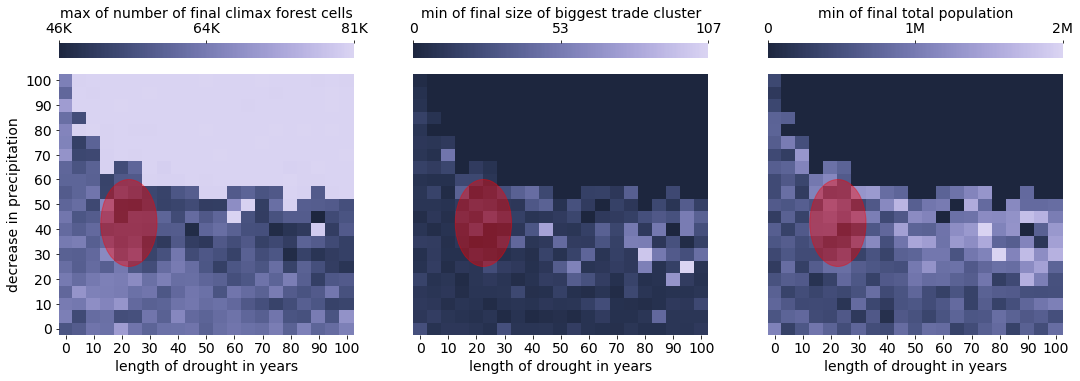

In [53]:
# Plot scenario 1
mpl.rcParams.update({'font.size': 14})

scn_number = 1

fig, axes = plt.subplots(nrows=1, ncols=3)            
for ax, clabel, observable, measure, ylabel, tlabel in zip(axes, clabels, observables, measures, ylabels, tick_labels[scn_number]):
    plt_heatmap(ax=ax,
                obs=observable,
                measure=measure,
                ylabels=ylabel,
                tlabels=tlabel,
                scn=scenarios[scn_number],
                clabel=clabel,
                min_data=final_states)

fig.savefig(f'stability_analysis_plot_{scn_number}.pdf', transparent=True)

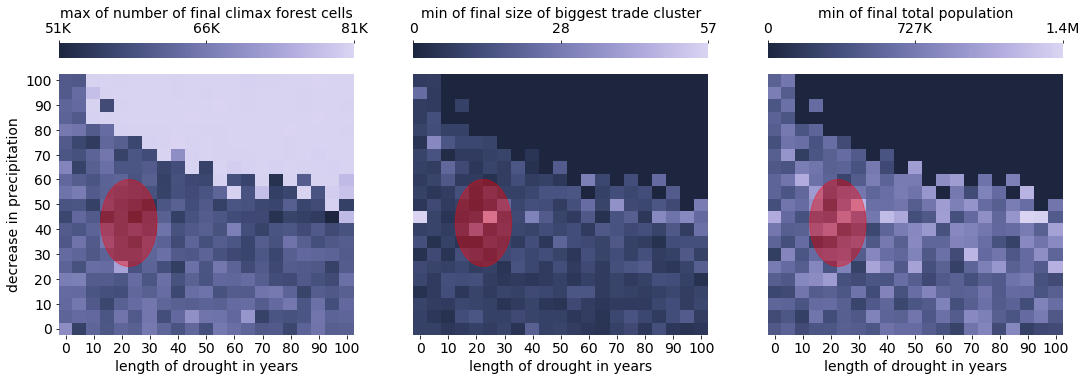

In [54]:
# Plot scenario 2
mpl.rcParams.update({'font.size': 14})

scn_number = 2

fig, axes = plt.subplots(nrows=1, ncols=3)            
for ax, clabel, observable, measure, ylabel, tlabel in zip(axes, clabels, observables, measures, ylabels, tick_labels[scn_number]):
    plt_heatmap(ax=ax,
                obs=observable,
                measure=measure,
                ylabels=ylabel,
                tlabels=tlabel,
                scn=scenarios[scn_number],
                clabel=clabel,
                min_data=final_states)

fig.savefig(f'stability_analysis_plot_{scn_number}.pdf', transparent=True)

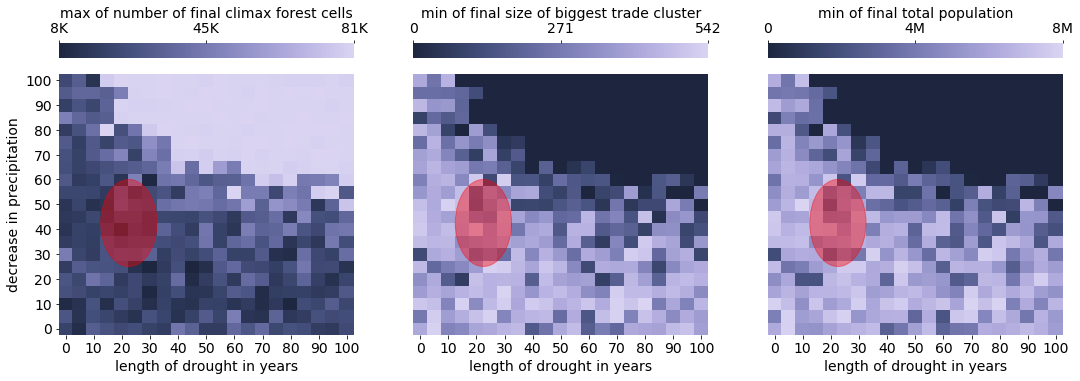

In [55]:
# Plot scenario 3
mpl.rcParams.update({'font.size': 14})

scn_number = 3

fig, axes = plt.subplots(nrows=1, ncols=3)            
for ax, clabel, observable, measure, ylabel, tlabel in zip(axes, clabels, observables, measures, ylabels, tick_labels[scn_number]):
    plt_heatmap(ax=ax,
                obs=observable,
                measure=measure,
                ylabels=ylabel,
                tlabels=tlabel,
                scn=scenarios[scn_number],
                clabel=clabel,
                min_data=final_states)

fig.savefig(f'stability_analysis_plot_{scn_number}.pdf', transparent=True)

In [2]:
all_trajectories = pd.read_pickle('/home/jakob/Project_MayaSim/output_data/X9_stability_analysis/results/all_trajectories')

In [3]:
data = all_trajectories
nruns = len(data.columns.values)
index = pd.Index(range(nruns))
index.name = 'run_id'
data.columns = index
data = data.stack('run_id')
empty_df = pd.DataFrame(index=data.index)
empty_df.to_pickle('index.pkl')
data.head()

d_length  d_severity  r_trade  d_start  run_id
0         0           6000     400      0               time  total_population  max settlement p...
                                        1               time  total_population  max settlement p...
                                        2               time  total_population  max settlement p...
                                        3               time  total_population  max settlement p...
                                        4               time  total_population  max settlement p...
dtype: object

In [4]:
k, k_max = 0, len(data)
saved_indices = []

In [8]:
data_tmp = data.copy()
index_levels = deepcopy(data_tmp.index.names)
print(index_levels)
with pd.HDFStore('/home/jakob/Project_MayaSim/output_data/X9_stability_analysis/results/all_trajectories.hd5') as store:
    app = False
    with tqdm(total=k_max) as pbar:
        for i, d in data_tmp.iteritems():
            k += 1
            pbar.update(1)
            if i not in saved_indices:
                for val, name in zip(i, index_levels):
                    d[name] = val
                    print(name, index_levels)
                print('columns', d.columns)
                print('index_levels', index_levels)
                print(['d_length', 'd_severity', 'r_trade', 'd_start', 'run_id'])
                print(index_levels + ['time'])
                d.set_index(['d_length', 'd_severity', 'r_trade', 'd_start', 'run_id'] + ['time'], inplace=True)
                if app:
                    try:
                        store.append('d1', d)
                        #print(f'{i} saved')
                        break
                    except:
                        pass
                        #print(f'{i} failed')
                else:
                    store.put('d1', d, append=app, format='table', data_columns=True)
                app=True
                saved_indices.append(i)
            else:
                pass
                #print(f'{i} already saved')

['d_length', 'd_severity', 'r_trade', 'd_start', 'run_id']


d_length ['d_length', 'd_severity', 'r_trade', 'd_start', 'run_id']
d_severity ['d_length', 'd_severity', 'r_trade', 'd_start', 'run_id']
r_trade ['d_length', 'd_severity', 'r_trade', 'd_start', 'run_id']
d_start ['d_length', 'd_severity', 'r_trade', 'd_start', 'run_id']
run_id ['d_length', 'd_severity', 'r_trade', 'd_start', 'run_id']
columns Index(['total_population', 'max settlement population', 'total_migrants',
       'total_settlements', 'total_agriculture_cells',
       'total_cells_in_influence', 'total_trade_links', 'mean_cluster_size',
       'max_cluster_size', 'new settlements', 'killed settlements',
       'built trade links', 'lost trade links', 'total_income_agriculture',
       'total_income_ecosystem', 'total_income_trade', 'mean_soil_degradation',
       'forest_state_3_cells', 'forest_state_2_cells', 'forest_state_1_cells',
       'es_income_forest', 'es_income_waterflow',
       'es_income_agricultural_productivity', 'es_income_precipitation',
       'es_income_pop_

KeyError: 'time'

In [1]:
print(['d_length', 'd_severity', 'r_trade', 'd_start', 'run_id'] + ['time'])

['d_length', 'd_severity', 'r_trade', 'd_start', 'run_id', 'time']
